**ESERCITAZIONE 11:**

Problema di regressione con un modello basato sulle reti neurali feed-forward (FFNN). Il dataset è costituito da istanze $x$, vettori di dimension $P$ a cui sono associate etichette reali $y$, che assumono valori continui. La rete neurale FFNN permette di addestrare una funzione di fit in grado di adattarsi ai dati, anche qaundo questi ultimi presentano una risposta non polinominale. Questo è possibile grazie alle funzioni di attivazione non polinominali (esempio: ReLU, Sigmoide...), le quali permettono di costruire un modello che, al variare dei parametri di addestramento, è in grado di riprodurre qualsiasi funzione.

**Esercizio 11.1:** Si consideri un dataset che riproduce la funzione $f(x) = 2x + 1$. Il dataset è costituito da istanze x nell'intervallo $[-1,1]$ a cui sono associate etichette $y$ generate aggiungendo a $f(x)$ un errore con distribuzione normale.
Si costruisce una FFNN per addestrare un modello per fittare $f(x)$, valutando l'accuratezza al variare della scelta del numero di epoche $N_{epo}$, il numero di dati di addestramento $x_{train}$ e all'ampiezza dell'errore $\sigma$.

In [3]:
import numpy as np
import pandas as pd

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5905 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

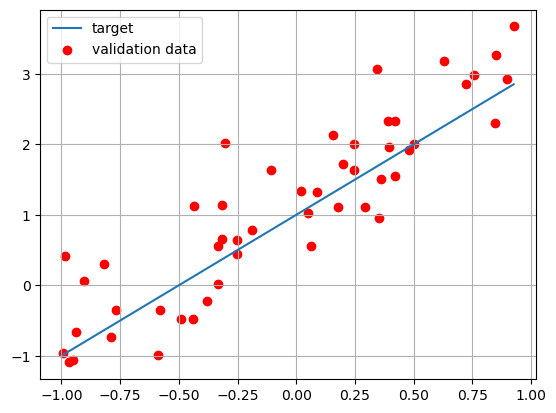

In [159]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Dal momento che il dataset riproduce un comportamento lineare, non è necessario impiegare una funzione di risposta non lineare, ma è sufficiente usare l'identià. Si costruisce dunque una FFNN con un solo $hidden \ layer$, che manda il dato $x$ in un unico nodo (nerurone) per produrre la quantità di output $h = w x + b$, dove $(w,b)$ sono i parametri del modello da ottimizzare (rispettivamente peso e bias). In questo caso questi ultimi corrispondono esattamente a coefficiente angolare e intercetta della relazione lineare. L'addestramento della rete avviene passando in input batch di dati presi in $x_{train}$, da cui i risultati $h$ vengono confrontati con le etichette presenti in $y_{train}$ attraverso la funzione di costo $C$. Al termine del passaggio di ciascun batch, avviene un passo di ottimizzazione dei parametri $(w,b)$ attraverso la discesa del gradiente stocastico (SGD). Quando vengono passati, suddivisi in batch, tutti i dati di addestramento, è stata completata un'epoca. Si ripete il processo di addestramento su diverse epoche, in maniera tale che l'ottimizzazione converga ai parametri che effettivmante minimizzano la funzione di costo.

In [160]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #uso un solo hidden layer con un solo nodo (neurone)

# Costruttore della FFNN
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Sommario dell'architettura della FFNN appena costruita
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=35,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/35
16/16 [==============================] - 0s 8ms/step - loss: 3.4491 - mse: 3.4491 - val_loss: 2.9746 - val_mse: 2.9746
Epoch 2/35
16/16 [==============================] - 0s 3ms/step - loss: 2.6606 - mse: 2.6606 - val_loss: 2.3277 - val_mse: 2.3277
Epoch 3/35
16/16 [==============================] - 0s 2ms/step - loss: 2.1122 - mse: 2.1122 - val_loss: 1.8723 - val_mse: 1.8723
Epoch 4/35
16/16 [==============================] - 0s 3ms/step - loss: 1.7183 - mse: 1.7183 - val_loss: 1.5356 - val_mse: 1.5356
Epoch 5/35
16/16 [==============================] - 0s 2ms/step - loss: 1.4235 - mse: 1.4235 - val_loss: 1.2760 - val_mse: 1.2760
Epoch 6/35
16/16 [==============================] - 0s 3ms/step - loss: 1.1953 - mse: 1.1953 - val_loss: 1.0817 - val_mse: 1.0817
Epoch 7/35
16/16 [==============================] - 0s 2ms/step - loss: 1.0200 - mse: 1.0200 - val_loss: 0.9311 - val_mse: 0.9311
Epoch 8/35
16/16 [==============================] - 0s 3ms/step - loss: 0.8826 - mse: 0.88

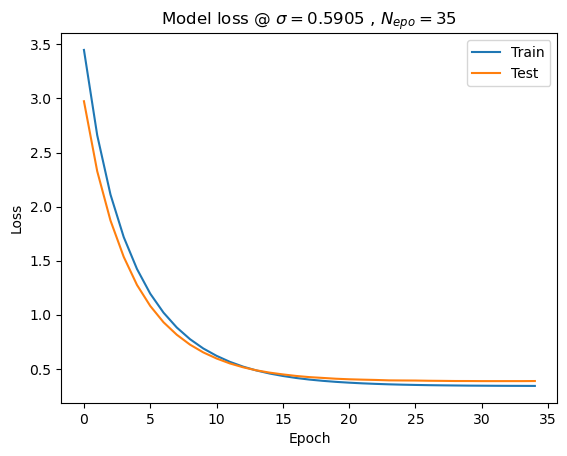

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss @ $\sigma = 0.5905$ , $N_{epo} = 35$')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si osserva che, scegliendo una $\sigma$ al di sopra di 0.59, il modello si adatta peggio ai dati di validazione che ai dati di training, già dopo 10 epoche di addestramento. Più è grande l'errore con cui vengono generate le etichette y, più il sistema sarà vulnerabile al fenomeno dell'overfitting, per cui il modello faticherà a generalizzare sui dati sui quali non è stato addestrato.

Si è scelto un numero di epoche tale per cui l'ottimizzazione dei parametri $(w,b)$ arrivi a convergenza (ovvero, in questo caso, ai valori attesi $(2,1)$ ). Più è piccolo il dataset, più epoche saranno necessarie per arrivare a convergenza.

In [163]:
model.get_weights()

[array([[2.0025358]], dtype=float32), array([0.9353614], dtype=float32)]

**Esercizio 11.2:** Effettuare la regressione del seguente polinomio $f(x) = 4− 3𝑥 − 2𝑥^2 + 3𝑥^3$.
Il problema può essere affrontato in due modi:

1. Si effettua una regressione lineare in uno spazio di tre dimensioni. In particolare, ogni dato è una istanza che, ad ogni numero estratto $x$, associa un vettore tridimensionale $(x,x^2,x^3)$. Tale vettore viene passato ad una FFNN con i pesi (a , b, c, d), corrispondenti ai coefficienti del polinomio.
2. Si considera ogni istanza del dataset come un semplice numero $x$ estratto, che viene passato alla FFNN. Questa deve essere costruita con un'architettura tale da riprodurre un polinomio di terzo grado a partire da un singolo scalare. Per aumentare l'espressività, si usano un layer hidden e un layer di output dotati di una funzione di attivazione opportuna.

Si procede ad implementare il secondo metodo:

In [205]:
#target parameters
a = 3, 
b = -2 
c = -3 
d = 4

# Definisco il polinomio di terzo grado
def polyn(x):
    return a * x**3 + b * x**2 + c * x + d
    
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = polyn(x_valid)# ideal (target) linear function

sigma = 0.25 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(polyn(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polyn(x_valid), sigma)

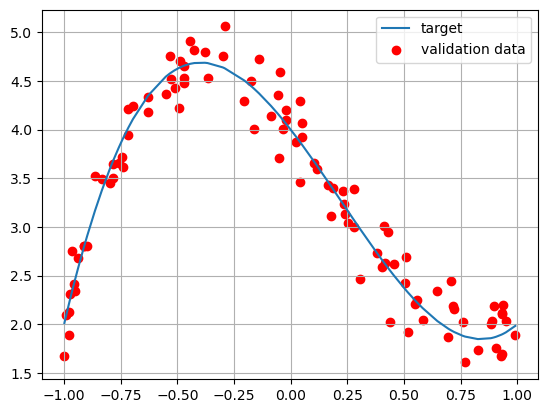

In [206]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Si procede a costruire la rete neurale con il layer hidden e il layer di output

In [219]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

# L'hidden layer contiene almeno 3 nodi, per rappresentare con opportuna espressività 
#i tre coefficienti (oltre l'intercetta) del polinomio
model.add(Dense(3, input_shape=(1,), activation='relu'))

# output layer: ha sempre un nodo perchè deve svolgere un compito di regressione
model.add(Dense(1, activation='sigmoid'))

# Costruttore della FFNN
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Sommario dell'architettura della FFNN appena costruita
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 3)                 6         
                                                                 
 dense_49 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [220]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=120,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/120
32/32 [==============================] - 0s 5ms/step - loss: 9.2177 - mse: 9.2177 - val_loss: 7.9260 - val_mse: 7.9260
Epoch 2/120
32/32 [==============================] - 0s 2ms/step - loss: 8.4963 - mse: 8.4963 - val_loss: 7.3806 - val_mse: 7.3806
Epoch 3/120
32/32 [==============================] - 0s 2ms/step - loss: 8.0365 - mse: 8.0365 - val_loss: 7.0309 - val_mse: 7.0309
Epoch 4/120
32/32 [==============================] - 0s 2ms/step - loss: 7.7319 - mse: 7.7319 - val_loss: 6.7959 - val_mse: 6.7959
Epoch 5/120
32/32 [==============================] - 0s 2ms/step - loss: 7.5210 - mse: 7.5210 - val_loss: 6.6312 - val_mse: 6.6312
Epoch 6/120
32/32 [==============================] - 0s 2ms/step - loss: 7.3684 - mse: 7.3684 - val_loss: 6.5083 - val_mse: 6.5083
Epoch 7/120
32/32 [==============================] - 0s 2ms/step - loss: 7.2532 - mse: 7.2532 - val_loss: 6.4150 - val_mse: 6.4150
Epoch 8/120
32/32 [==============================] - 0s 2ms/step - loss: 7.1628 - m

In [221]:
# return weights and biases
model.get_weights()

[array([[ 0.3211233 ,  0.5621222 , -0.34581012]], dtype=float32),
 array([ 2.033716  , -0.33877325, -0.3441459 ], dtype=float32),
 array([[ 1.972242 ],
        [-0.7464173],
        [-0.9269627]], dtype=float32),
 array([3.2009866], dtype=float32)]

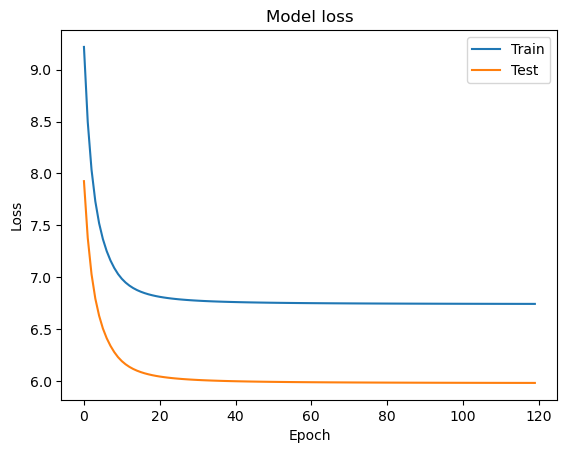

In [222]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

**Esercizio 11.3:** fit della funzione 2D $f(x,y) = sin(x^2 + y^2)$.

In [17]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

# Definisco la funzione seno
def sine(x,y):
    l = len(x)
    vector = np.zeros((l,1))
    for i in range(0,l):
        vector[i] = mt.sin(x[i]**2 + y[i]**2)
    return vector
    
np.random.seed(0)
x1_train = np.random.uniform(-1.5, +1.5, 1000)
x1_valid = np.random.uniform(-1.5, +1.5, 100)
x2_train = np.random.uniform(-1.5, +1.5, 1000)
x2_valid = np.random.uniform(-1.5, +1.5, 100)
x2_valid.sort()
x1_valid.sort()
y_target = sine(x1_valid, x2_valid)

print(np.shape(y_target))

sigma = 0.25
y_train = np.random.normal(sine(x1_train,x2_train), sigma)
y_valid = np.random.normal(sine(x1_valid,x2_valid), sigma)

(100, 1)


In [24]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

# L'hidden layer contiene almeno 3 nodi, per rappresentare con opportuna espressività 
#i tre coefficienti (oltre l'intercetta) del polinomio
model.add(Dense(3, input_shape=(2,), activation='relu'))

# output layer: ha sempre un nodo perchè deve svolgere un compito di regressione
model.add(Dense(1, activation='sigmoid'))

# Costruttore della FFNN
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Sommario dell'architettura della FFNN appena costruita
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 9         
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Il dataset è costruito come matrice di design $N x 2$: ogni istanza ha due caratteristiche $x_1$ e $x_2$, corrispondenti alle due variabili indipendenti della funzione 2D.

In [25]:
x_train = np.zeros((1000,2))
x_train[:,0] = x1_train
x_train[:,1] = x2_train

x_valid = np.zeros((100,2))
x_valid[:,0] = x1_valid
x_valid[:,1] = x2_valid

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=120,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/120
32/32 [==============================] - 0s 4ms/step - loss: 0.2423 - mse: 0.2423 - val_loss: 0.3994 - val_mse: 0.3994
Epoch 2/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2379 - mse: 0.2379 - val_loss: 0.4039 - val_mse: 0.4039
Epoch 3/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2338 - mse: 0.2338 - val_loss: 0.4083 - val_mse: 0.4083
Epoch 4/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2301 - mse: 0.2301 - val_loss: 0.4127 - val_mse: 0.4127
Epoch 5/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2270 - mse: 0.2270 - val_loss: 0.4170 - val_mse: 0.4170
Epoch 6/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2241 - mse: 0.2241 - val_loss: 0.4213 - val_mse: 0.4213
Epoch 7/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2214 - mse: 0.2214 - val_loss: 0.4253 - val_mse: 0.4253
Epoch 8/120
32/32 [==============================] - 0s 3ms/step - loss: 0.2191 - m

32/32 [==============================] - 0s 2ms/step - loss: 0.2016 - mse: 0.2016 - val_loss: 0.4995 - val_mse: 0.4995
Epoch 64/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2016 - mse: 0.2016 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 65/120
32/32 [==============================] - 0s 3ms/step - loss: 0.2016 - mse: 0.2016 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 66/120
32/32 [==============================] - 0s 3ms/step - loss: 0.2016 - mse: 0.2016 - val_loss: 0.5003 - val_mse: 0.5003
Epoch 67/120
32/32 [==============================] - 0s 3ms/step - loss: 0.2016 - mse: 0.2016 - val_loss: 0.5004 - val_mse: 0.5004
Epoch 68/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2015 - mse: 0.2015 - val_loss: 0.5006 - val_mse: 0.5006
Epoch 69/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2015 - mse: 0.2015 - val_loss: 0.5007 - val_mse: 0.5007
Epoch 70/120
32/32 [==============================] - 0s 2ms/step - loss: 0.2015 - mse: 0

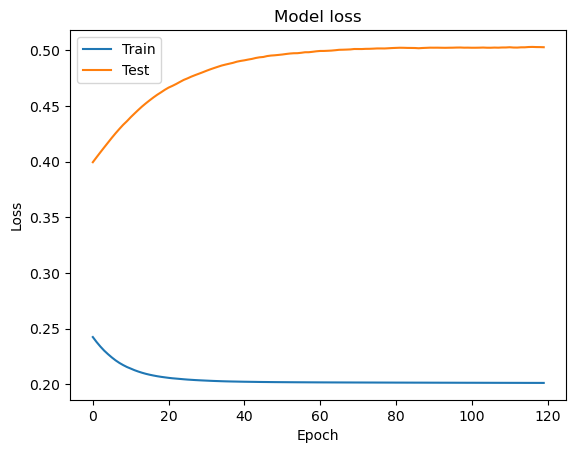

In [26]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

L'algoritmo, scelto con gli stessi iperparametri dell'esercizio 5.2, non è in grado di generalizzare sui dati di test il modello addestrtao sul dataset di training.